In [1]:
from glob import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
method_list = ["naive", "shortcut", "livereflow", "consistency"]

In [11]:
ode_step = 4
result_dict = {}
for method in method_list:
    for if_sdot in [True, False]:
        exp_name = "_".join([method, "sdot" if if_sdot else "nosdot"])
        print(exp_name)
        dir_list = glob(f"./results/{exp_name}/*")
        step_list = []
        fid_list = []
        for dir in dir_list:
            try:
                step = int(os.path.basename(dir))
                info_path = os.path.join(dir, "info.csv")
                info_df = pd.read_csv(info_path)
                fid_value = info_df.loc[info_df["step"] == 4, "fid-50k"].values[0]
                step_list += [step]
                fid_list += [fid_value]
            except:
                Exception()
        result_dict[exp_name] = {"step_list": step_list, "fid_list": fid_list}

naive_sdot
naive_nosdot
shortcut_sdot
shortcut_nosdot
livereflow_sdot
livereflow_nosdot
consistency_sdot
consistency_nosdot


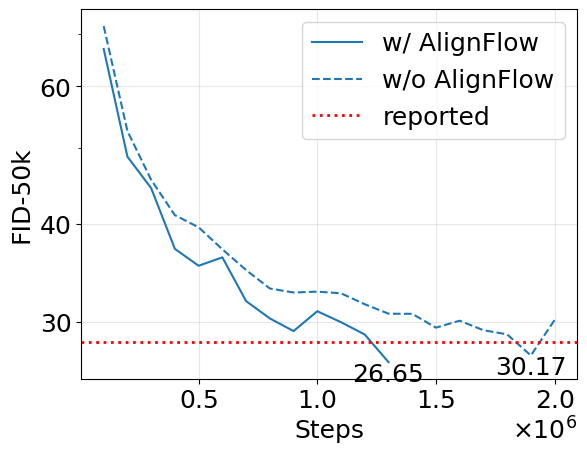

In [40]:
plt.figure()
plt.rcParams['font.size'] = 18
# plt.rcParams['axes.formatter.use_mathtext'] = True


exp_name = "shortcut_sdot"
step_list = result_dict[exp_name]["step_list"]
fid_list = result_dict[exp_name]["fid_list"]
step_list = np.array(step_list)
fid_list = np.array(fid_list)
indices = np.argsort(step_list)
step_list = step_list[indices][0:13]
fid_list = fid_list[indices][0:13]

plt.plot(step_list, fid_list, color="C0", linestyle="-", label='w/ AlignFlow')
plt.text(x=step_list[-1], y=fid_list[-1], s=f"{fid_list[-1]:.2f}", ha='center', va='top')


exp_name = "shortcut_nosdot"
step_list = result_dict[exp_name]["step_list"]
fid_list = result_dict[exp_name]["fid_list"]
step_list = np.array(step_list)
fid_list = np.array(fid_list)
indices = np.argsort(step_list)
step_list = step_list[indices]
fid_list = fid_list[indices]

plt.plot(step_list, fid_list, color="C0", linestyle= "--", label='w/o AlignFlow')
plt.text(x=step_list[-2], y=fid_list[-2], s=f"{fid_list[-1]:.2f}", ha='center', va='top')



plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))


plt.axhline(y=28.3, color='r', linestyle=':', linewidth=2, label='reported')


plt.yscale("log")
y_ticks = [30, 40, 60]
ax = plt.gca()
plt.yticks(y_ticks, labels=[str(t) for t in y_ticks])


plt.xlabel("Steps")
plt.ylabel("FID-50k")
plt.grid(True, alpha=0.3)

plt.legend()
plt.savefig(f"imagenet_DiTB_fid_shortcut.pdf", bbox_inches="tight")
plt.show()

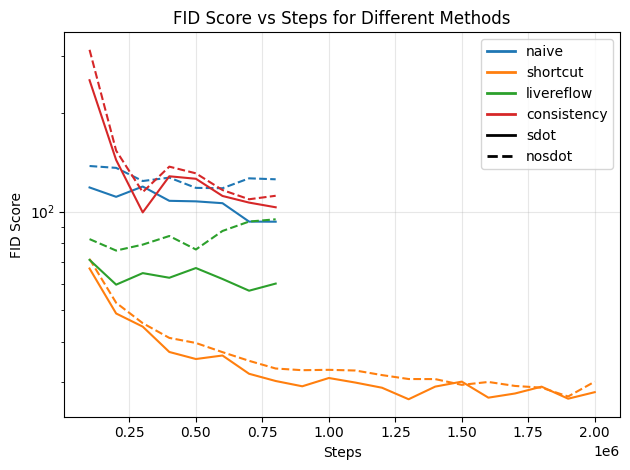

In [4]:
# Create a color dictionary for methods
colors = {}
for i, method in enumerate(method_list):
    colors[method] = f"C{i}"  # Use matplotlib's default color cycle

plt.figure()

for method in method_list:
    for if_sdot in [True, False]:
        exp_name = "_".join([method, "sdot" if if_sdot else "nosdot"])
        step_list = result_dict[exp_name]["step_list"]
        fid_list = result_dict[exp_name]["fid_list"]
        step_list = np.array(step_list)
        fid_list = np.array(fid_list)
        indices = np.argsort(step_list)
        step_list = step_list[indices]
        fid_list = fid_list[indices]

        # Same color for each method, but different line style based on if_sdot
        plt.plot(
            step_list,
            fid_list,
            color=colors[method],
            linestyle="-" if if_sdot else "--",  # solid for sdot, dashed for nosdot
            label=f"{method} ({'sdot' if if_sdot else 'nosdot'})",
        )

plt.yscale("log")
plt.xlabel("Steps")
plt.ylabel("FID Score")
plt.title("FID Score vs Steps for Different Methods")
plt.grid(True, alpha=0.3)
plt.legend(loc="best")
plt.tight_layout()

from matplotlib.lines import Line2D

# Create custom legend elements
legend_elements = []
for method in method_list:
    legend_elements.append(Line2D([0], [0], color=colors[method], lw=2, label=method))

legend_elements.append(
    Line2D([0], [0], color="black", lw=2, linestyle="-", label="sdot")
)
legend_elements.append(
    Line2D([0], [0], color="black", lw=2, linestyle="--", label="nosdot")
)

# Create two-column legend
plt.legend(handles=legend_elements, loc="best")

plt.savefig("imagenet_DiTB_fid.pdf", bbox_inches="tight")

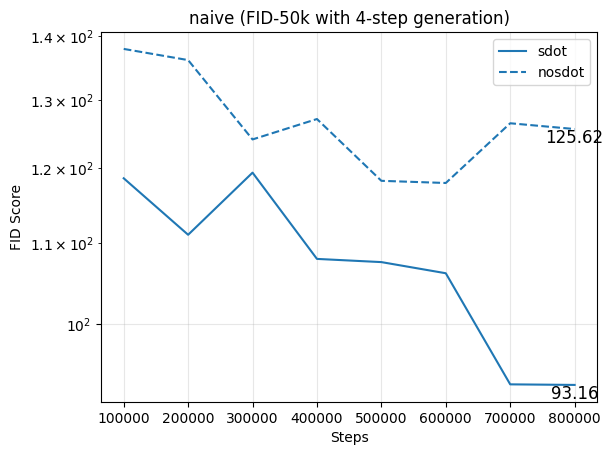

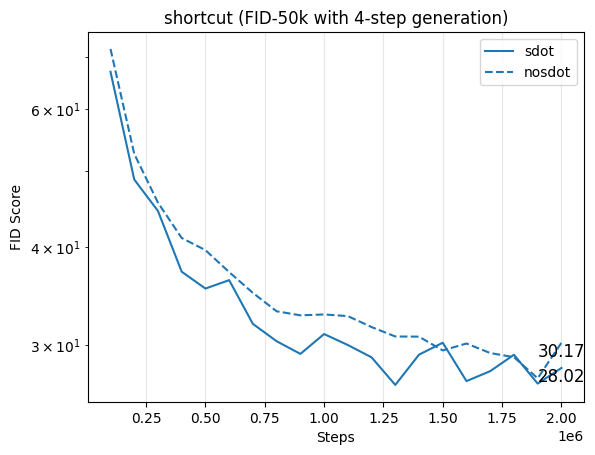

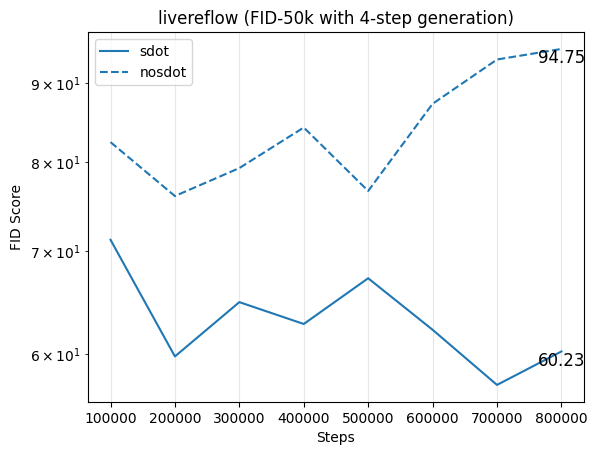

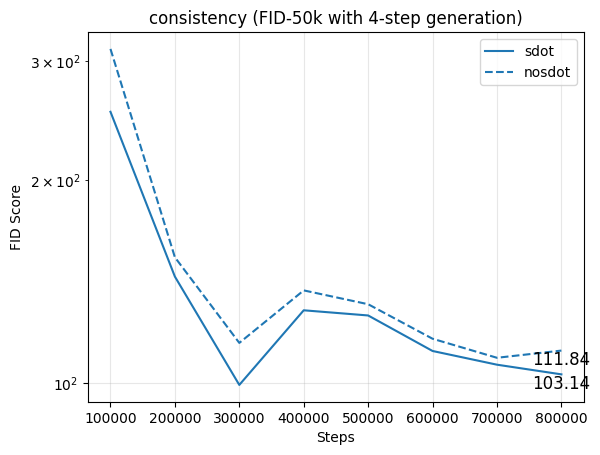

In [5]:
for method in method_list:
    plt.figure()
    for if_sdot in [True, False]:
        exp_name = "_".join([method, "sdot" if if_sdot else "nosdot"])
        step_list = result_dict[exp_name]["step_list"]
        fid_list = result_dict[exp_name]["fid_list"]
        step_list = np.array(step_list)
        fid_list = np.array(fid_list)
        indices = np.argsort(step_list)
        step_list = step_list[indices]
        fid_list = fid_list[indices]

        # Same color for each method, but different line style based on if_sdot
        plt.plot(
            step_list,
            fid_list,
            color="C0",
            linestyle="-" if if_sdot else "--",  # solid for sdot, dashed for nosdot
            label=f"{'sdot' if if_sdot else 'nosdot'}",
        )
        plt.text(x=step_list[-1], y=fid_list[-1], s=f"{fid_list[-1]:.2f}", fontsize=12, ha='center', va='top')
    plt.yscale("log")
    plt.xlabel("Steps")
    plt.ylabel("FID Score")
    plt.grid(True, alpha=0.3)

    plt.title(f"{method} (FID-50k with 4-step generation)")
    plt.legend()
    plt.savefig(f"imagenet_DiTB_fid_{method}.pdf", bbox_inches="tight")
    plt.show()

In [6]:
ode_step = 4
result_dict = {}
method = "shortcut"
for if_sdot in [True, False]:
    exp_name = "_".join([method, "sdot" if if_sdot else "nosdot"])
    print(exp_name)
    dir_list = glob(f"./results_XL/{exp_name}/*")
    step_list = []
    fid_list = []
    for dir in dir_list:
        try:
            step = int(os.path.basename(dir))
            info_path = os.path.join(dir, "info.csv")
            info_df = pd.read_csv(info_path)
            fid_value = info_df.loc[info_df["step"] == 4, "fid-50k"].values[0]
            step_list += [step]
            fid_list += [fid_value]
        except:
            Exception()
    result_dict[exp_name] = {"step_list": step_list, "fid_list": fid_list}

shortcut_sdot
shortcut_nosdot


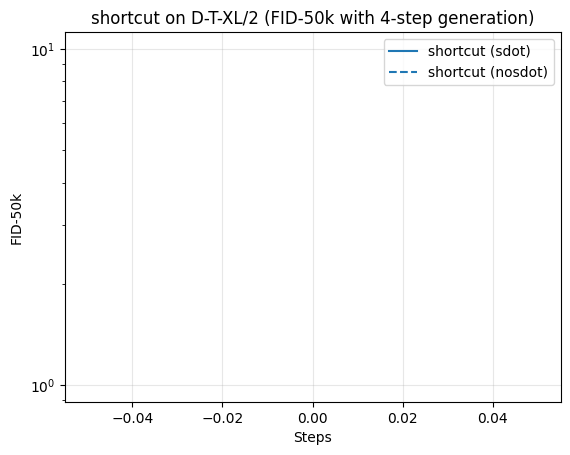

In [7]:
plt.figure()

method = "shortcut"
for if_sdot in [True, False]:
    exp_name = "_".join([method, "sdot" if if_sdot else "nosdot"])
    step_list = result_dict[exp_name]["step_list"]
    fid_list = result_dict[exp_name]["fid_list"]
    step_list = np.array(step_list)
    fid_list = np.array(fid_list)
    indices = np.argsort(step_list)
    step_list = step_list[indices]
    fid_list = fid_list[indices]

    # Same color for each method, but different line style based on if_sdot
    plt.plot(
        step_list,
        fid_list,
        color="C0",
        linestyle="-" if if_sdot else "--",  # solid for sdot, dashed for nosdot
        label=f"{method} ({'sdot' if if_sdot else 'nosdot'})",
    )

plt.yscale("log")
plt.xlabel("Steps")
plt.ylabel("FID-50k")
plt.title(f"{method} on D-T-XL/2 (FID-50k with 4-step generation)")
plt.grid(True, alpha=0.3)
plt.legend(loc="best")
plt.legend()

plt.savefig("imagenet_DiTXL_fid.pdf", bbox_inches="tight")

In [10]:
result_dict

{'shortcut_sdot': {'step_list': [], 'fid_list': []},
 'shortcut_nosdot': {'step_list': [], 'fid_list': []}}